# The Discrete Fourier Transform

The Fourier Transform is perhaps one of the most often used transforms in applied mathematics. Even if you have not seen it before, I'll try my best here to convey some intuition as to how this transform works and why it is useful, while also providing mathematical proof as to why this transform works the way it does. For sake of this class, I will spend more on the Linear Algebra side of the proofs.

The Fourier Transform utilizes the fact that any periodic function can be decomposed into a sum of finite or countably infinite sinusoidal components. Each component is characterized solely by its amplitude, frequency, and phase. In many situations, it is exceedingly useful to be able to pick apart exactly what sinusoidal components make up a given function. In the case of the Discrete Fourier Transform, we make our lives easier by constraining our problem to integer multiples of frequency, as oposed to a continuous distribution, and therefore only have finite dimensional problems to work with.

Definition: For the purposes of this paper, a Fourier Series is the decomposition of a periodic sampling of a signal $\{ x_i : i \in \mathbb{Z}, i \in [0,N-1] \}$ into a sum of $N$ finite sinusoidal components given by
## $x_{n} = \frac{1}{\sqrt{N}} \sum\limits_{\omega=0}^{N-1} A_{\omega} cos(2 \pi \omega \cdot \frac{n}{N}) + B_{\omega} sin(2 \pi \omega \cdot \frac{n}{N})$

## $n \in \mathbb{Z}$

Where $A_{\omega}$ and $B_{\omega}$ are the associated amplitudes of each sinusoidal's $cos$ and $sin$ components (to allow for phase, you need both $sin$ and $cos$). It will soon become clear why there is a need for the multiplier $\frac{1}{\sqrt{N}}.$

But, this can be compactified further if we use Euler's Identity:

## $Xe^{i \phi} = X \cdot (cos(\phi) + i\cdot sin(\phi))$

Where now we can express the above series with the use of one complex amplitude instead of two individual $cos$ and $sin$ amplitudes.

## $\begin{align} x_{n} = \frac{1}{\sqrt{N}} \sum\limits_{\omega=0}^{N-1} X_{\omega} e^{i 2 \pi \omega \cdot \frac{n}{N}} : X_{\omega} \in \mathbb{C} \end{align}$

Below is a graphical example by what I mean when I talk about a periodic signal being made up of these sinusoidals. One can imagine a sinusoidal function as the shadow cast by a spinning wheel as time progresses. If you sum up the shadows of wheels of the right size, and whose angular speed and initial position are carefully picked, you can get any periodic signal you want. In this case, the series is approaching a square wave.

In [3]:
def video(fname, mimetype):
    from IPython.display import HTML
    video_encoded = open(fname, "rb").read().encode("base64")
    video_tag = '<video controls alt="test" src="data:video/{0};base64,{1}">'.format(mimetype, video_encoded)
    return HTML(data=video_tag)

video("images/fourier_series_animation.mp4", "mp4")

Now that we know that a signal can be decomposed like this, we only have to find the associated $X_{\omega}$'s for each frequency's presence in the signal. You may have already noticed it, but the Fourier Series formula looks curiously similar to the formula for expressing a vector in terms of the basis for the space in which it resides:

## $\vec{v} = \sum\limits_{k=1}^{N} a_k \cdot u_k : \vec{u}_k \in \beta = \{\vec{u}_1, \vec{u}_2, \dotsb , \vec{u}_N\}$

So let's take that idea and run with it. First of all, I would like to make the claim that

## $\beta = \{\vec{u}_{\omega}\} : \vec{u}_{\omega} = \frac{1}{\sqrt{N}} [e^{i 2 \pi \omega \cdot \frac{n}{N}} : n = 0,1,\dotsb , N-1]^T$

(intuitively described as N periodic samples of a complex sinusoidal phasor) forms an orthonormal basis that generates $\mathbb{C}^N$.

#### Proof:

Let

## $<\vec{u}, \vec{v}> \mathrel{\mathop:}= \vec{v}^* \vec{u} $

denote the standard inner product on $\mathbb{C}^N$ and recall that two vectors $\vec{u}, \vec{v}$ are orthogonal if and only if $<\vec{u}, \vec{v}> = 0$. Now, let $\vec{u}_{a}, \vec{u}_{b} \in \beta$, then consider

## $<\vec{u}_{a}, \vec{u}_{b}> = \vec{u}_{b}^* \vec{u}_{a} = \frac{1}{N}\sum\limits_{n=0}^{N-1} (e^{i 2 \pi (-b) \cdot \frac{n}{N}})(e^{i 2 \pi a \cdot \frac{n}{N}})$

## $=\frac{1}{N} \sum\limits_{n=0}^{N-1} e^{i 2 \pi (a-b) \cdot \frac{n}{N}} = \frac{1}{N} \cdot N \delta_{ab} = \delta_{ab}$

where in the last section of this equation we utilize the fact that the sum of N distinct Nth roots of unity equals zero. Therefore the inner product between any two elements in $\beta$ is zero unless the two vectors are the same. And, if we consider the standard norm on $\mathbb{C}^N$

## $\|\vec{u}\| = \sqrt{<\vec{u},\vec{u}>}$

Then it becomes clear that the vectors in $\beta$ are also normalized because

## $\|\vec{u}_{\omega}\| = \sqrt{<\vec{u}_{\omega},\vec{u}_{\omega}>} = \sqrt{\delta_{{\omega}{\omega}}} = 1$

## $\forall {\omega}\in[0,N-1]$

All that is left to see is that each $\vec{u}_i \in \beta$ are also members of $\mathbb{C}^N$, and therefore by Corollary 2 to Theorem 6.3 (orthogonal sets are LI), $\beta$ forms an orthonormal basis for $\mathbb{C}^N \blacksquare$

Now, consider the vectors $\vec{X}$ (Fourier Coefficients) and $\vec{x}$ (N periodic samples) both in $\mathbb{C}^N$ such that

## $\vec{X} = [X_1, X_2, \dotsb, X_{N-1}]^T$

## $\vec{x} = [x_1, x_2, \dotsb, x_{N-1}]^T$

We must find how much of each basis vector makes up our input vector $\vec{x}$

Let us define the Discrete Fourier Transform as:

## $\mathscr{F}:\mathbb{C}^N \rightarrow \mathbb{C}^N$

Which takes a vector from $\mathbb{C}^N$ containing samples of some periodic function and returns another vector in $\mathbb{C}^N$ that expresses our input vector in terms of our aformentioned orthonormal basis $\beta$.

Using theorem 6.3, we know that we can express $\vec{x}$ in terms of $\beta$ by use of the formula

## $\vec{x} = \sum\limits_{\omega=0}^{N-1} \frac{<\vec{x}, \vec{u}_{\omega}>}{\|\vec{u}_{\omega}\|^2}\vec{u}_{\omega} =  \sum\limits_{\omega=0}^{N-1} <\vec{x}, \vec{u}_{\omega}>\vec{u}_{\omega}$

But since $\vec{u}_{\omega}$ is just the basis vector representing discrete samples of a sinusoidal at frequency ${\omega}$, clearly the set of each $<\vec{x}, \vec{u}_{\omega}>$ makes up the Fourier Coefficients of this system.

This means that we can now re-write the entries of $\vec{X}$ as

## $X_{\omega} = <\vec{x}, \vec{u}_{\omega}>$

And so the vector $\vec{X}$ can be expressed as

## $\vec{X} = [<\vec{x}, \vec{u}_{0}>, <\vec{x}, \vec{u}_{1}>, \dotsb, <\vec{x}, \vec{u}_{N-1}>]^T$

But now we have our output vector in terms of our input, so we can also say that

## $\mathscr{F}(\vec{x}) = [<\vec{x}, \vec{u}_{0}>, <\vec{x}, \vec{u}_{1}>, \dotsb, <\vec{x}, \vec{u}_{N-1}>]^T$

Which can show us that the Discrete Fourier Transform is , in fact, also a linear transformation

Claim: $\mathscr{F} \in \mathscr{L}(\mathbb{C}^N,\mathbb{C}^N)$

#### Proof:

## $\mathscr{F}(c\vec{x}+\vec{y}) = $

## $[<c\vec{x}+\vec{y}, \vec{u}_{0}>, <c\vec{x}+\vec{y}, \vec{u}_{1}>, \dotsb, <c\vec{x}+\vec{y}, \vec{u}_{N-1}>]^T = $

## $c[<\vec{x}, \vec{u}_{0}>, <\vec{x}, \vec{u}_{1}>, \dotsb, <\vec{x}, \vec{u}_{N-1}>]^T + $

## $[<\vec{y}, \vec{u}_{0}>, <\vec{y}, \vec{u}_{1}>, \dotsb, <\vec{y}, \vec{u}_{N-1}>]^T = $

## $c\mathscr{F}(\vec{x})+\mathscr{F}(\vec{y})\blacksquare$

And, as a linear transformation, the DFT also has a matrix representation

## $\mathscr{F}(\vec{x}) = [<\vec{x}, \vec{u}_{0}>, <\vec{x}, \vec{u}_{1}>, \dotsb, <\vec{x}, \vec{u}_{N-1}>]^T$

## $= [\vec{u}_{0}^*\vec{x}, \vec{u}_{1}^*\vec{x}, \dotsb, \vec{u}_{N-1}^*\vec{x}]^T$

## $= [\vec{u}_{0}, \vec{u}_{1}, \dotsb, \vec{u}_{N-1}]^* \cdot \vec{x}$

## $=\frac{1}{\sqrt{N}} \begin{bmatrix}\psi_0^0 & \psi_0^1 & \dots & \psi_0^{N-1} \\ \psi_1^0 & \psi_1^1 & \dots & \psi_1^{N-1} \\ \vdots & \vdots & \ddots & \vdots \\ \psi_{N-1}^0 & \psi_{N-1}^1 & \dots & \psi_{N-1}^{N-1} \end{bmatrix}\cdot \vec{x}:\psi_{\omega}^{n} = e^{-i 2 \pi \omega \frac{n}{N}}$

## $= [\mathscr{F}] \cdot \vec{x}$

And since we have shown that $[\mathscr{F}]$ is a matrix consisting of orthonormal vectors, we can also say that
## $[\mathscr{F}]^{-1} = [\mathscr{F}]^*$

since

## $[\mathscr{F}] \cdot [\mathscr{F}]^* =$

## $\begin{bmatrix}\leftarrow \vec{u}_0^* \rightarrow \\ \leftarrow \vec{u}_1^*\rightarrow \\ \vdots \\ \leftarrow \vec{u}_{N-1}^* \rightarrow \end{bmatrix} \cdot [\vec{u}_{0}, \vec{u}_{1}, \dotsb, \vec{u}_{N-1}] = I_N$

because $<\vec{u}_i,\vec{u}_j> = \delta_{ij}$.

Which is why this version of the Discrete Fourier Transform is called the Unitary DFT. Expressed as a series, the unitary DFT looks like

## $X_{\omega} = \frac{1}{\sqrt{N}} \sum\limits_{n=0}^{N-1} x_{n} e^{- i 2 \pi \omega \cdot \frac{n}{N}}$

## An Example

A common use for the Discrete Fourier Transform is the filtering of noisy data. Oftentimes when data is collected from a test environment, there is a lot of unwanted variation that does not contribute to the results and only results in visually confusing and unappealing data. A really great way to take care of this problem is by use of filtering.

Filtering involves taking a Discrete Fourier Transform of a given data set, removing unwanted frequency bands in Fourier Space, then taking the inverse DFT of what remains to get back data at only the frequencies you need.

One minor note I want to add before I get into this example is the unavoidable fact that given a sample rate of N Hz (or just N samples for that matter, if we are taking samples in every second), we can only accurately detect frequencies up to N/2 Hz. This is what is called the Nyquist Frequency. Intuitively speaking, this is due to the fact that given some discrete samples of a sinusoidal, there are actually infinitely many sinusoidals that can match those samples, each at an integer multiple of the harmonic.

Anyhow, here is an example of some noisy data (note that in this case we are using the DFT to take a vector from $\mathbb{R}^N \rightarrow \mathbb{C}^N$ instead of $\mathbb{C}^N \rightarrow \mathbb{C}^N$):

In [19]:
from pylab import *
import numpy

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

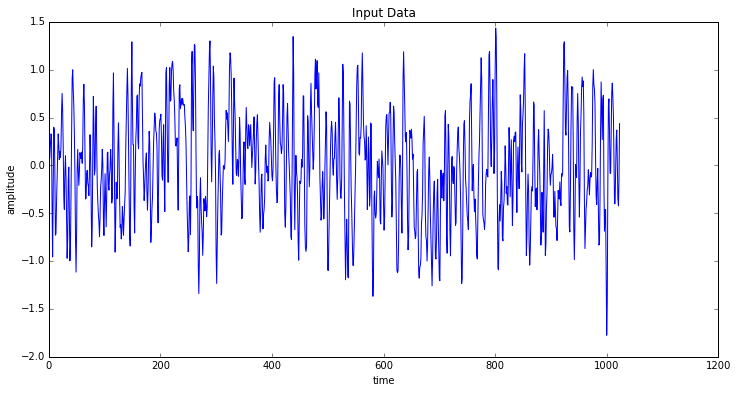

In [113]:
sample_rate = 10 # samples per sec
total_sampling_time = 3
num_samples = sample_rate * total_sampling_time

from scipy.ndimage import filters
wave = filters.gaussian_filter(randn(1024),1.0)

setup_graph(title='Input Data', x_label='time', y_label='amplitude', fig_size=(12,6))
_ = plot(wave)

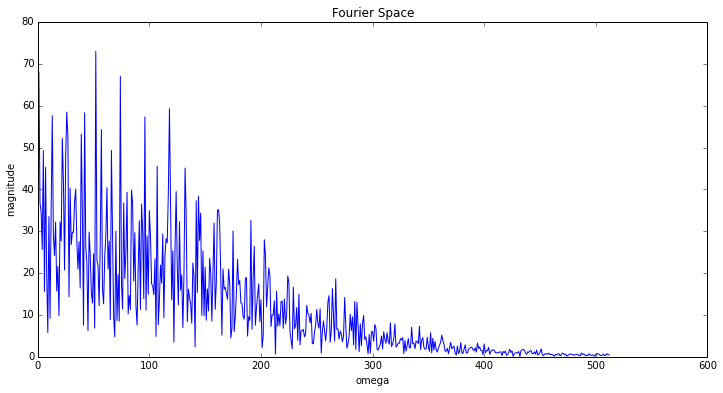

In [117]:
DFT = numpy.fft.rfft(wave)

num_samples = len(DFT)

frequencies = [(i*1.0/num_samples)*sample_rate for i in range(num_samples)]
actual_magnitudes = [sqrt(i.real**2 + i.imag**2)/num_samples for i in DFT]

setup_graph(title='Fourier Space', x_label='omega', y_label='magnitude', fig_size=(12,6))
_ = plot([abs(i) for i in DFT])

Note that the horizontal axis is not in Hz, but is just the omega seen in the DFT formula. For a frequency in Hz, one would need to calculate (sample rate)

Let's say that we only care for the lower frequency information, and we have determined that we can cut off any frequencies below $\omega = 100$

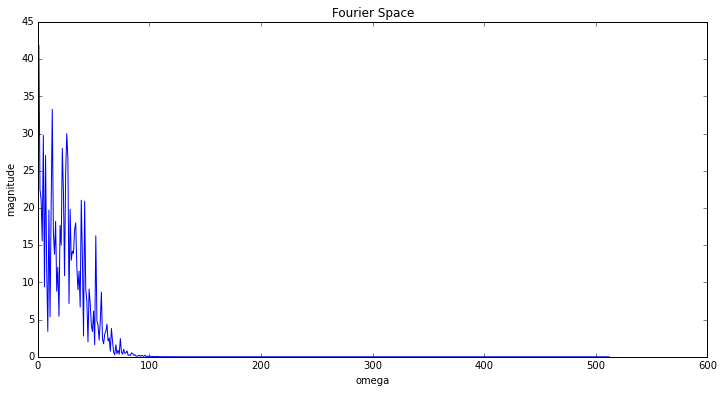

In [120]:
cutoff = 50
rate = 0.1

sigmoid = lambda t, r, shift: 1.0 - 1.0/(1+numpy.exp(rate*(-t+shift))) #Sigmoid function that rolls off at shift point

#for i in range(len(DFT)-cutoff):
#    DFT[cutoff+i] = 0

DFT = [sigmoid(t, rate, cutoff)*DFT[t] for t in range(len(DFT))]
    
setup_graph(title='Fourier Space', x_label='omega', y_label='magnitude', fig_size=(12,6))
_ = plot([abs(i) for i in DFT])

Now let's see what this has done to our data set.

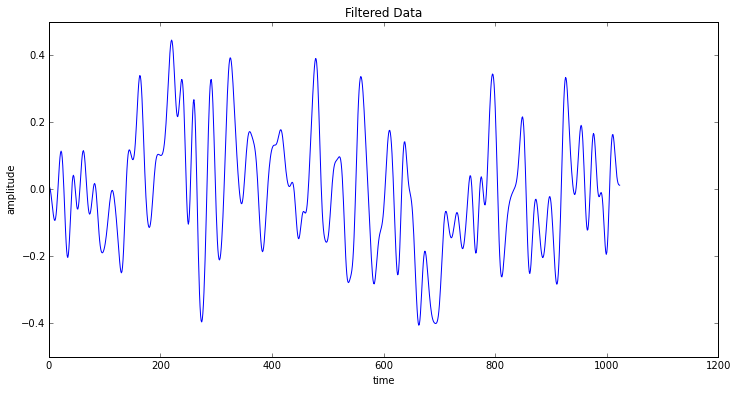

In [121]:
i_DFT = numpy.fft.irfft(DFT)

setup_graph(title='Filtered Data', x_label='time', y_label='amplitude', fig_size=(12,6))
_ = plot(i_DFT)

Which compared to our original data

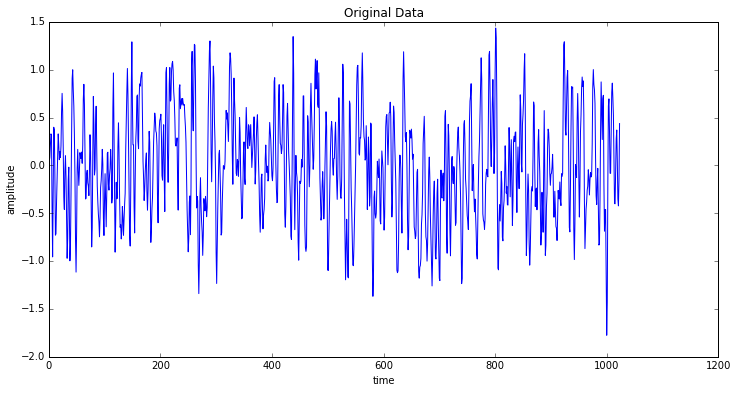

In [123]:
setup_graph(title='Original Data', x_label='time', y_label='amplitude', fig_size=(12,6))
_ = plot(wave)

is much more readable. Not only that, but in many cases such as speech recognition or audio engineering this type of filtering will allow selective removal of any troublesome frequencies that ring out in a room or cloud a signal. Without math like this, radio, digital music, compression of images, medical interferometery, elecrical engineering, and analysis of data in general would be greatly hindered.